In [242]:
import pandas as pd
import sklearn
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from numpy import log1p
from sklearn.preprocessing import normalize

# data cleaning

In [200]:
metadata = pd.read_csv('metadata.csv')
metadata.head()

,file_id,file_name,case_id,sample_id,portion_id,analyte_id,aliquots_id,project_id
0,4236170e-67b4-4bd7-badd-4fcba557d0e3,6df80c92-775e-4bcf-b2c7-6cbd7e147447.rna_seq.a...,TCGA-43-7657,TCGA-43-7657-01A,TCGA-43-7657-01A-31,TCGA-43-7657-01A-31R,TCGA-43-7657-01A-31R-2125-07,TCGA-LUSC
1,7da3a15e-9911-4429-98e7-d7ee03d7ad7f,ef697db7-3b14-4999-9e9b-85c37718f615.rna_seq.a...,TCGA-60-2695,TCGA-60-2695-01A,TCGA-60-2695-01A-01,TCGA-60-2695-01A-01R,TCGA-60-2695-01A-01R-0851-07,TCGA-LUSC
2,0f3755ec-9e0e-4fc9-ae14-a32d6b486a7e,b1361753-6f8c-4038-addb-9e4767ca627c.rna_seq.a...,TCGA-21-1070,TCGA-21-1070-01A,TCGA-21-1070-01A-01,TCGA-21-1070-01A-01R,TCGA-21-1070-01A-01R-0692-07,TCGA-LUSC
3,94cab1e2-dcd6-43b7-b359-75b0c4a485ba,23f1ad0c-c9d5-408f-bba8-1bb71364007b.rna_seq.a...,TCGA-94-7033,TCGA-94-7033-01A,TCGA-94-7033-01A-11,TCGA-94-7033-01A-11R,TCGA-94-7033-01A-11R-1949-07,TCGA-LUSC
4,7909042c-47f9-4f3a-9591-71f8856a571d,0648c653-891f-4202-8d83-59be8fc5e80c.rna_seq.a...,TCGA-68-8250,TCGA-68-8250-01A,TCGA-68-8250-01A-11,TCGA-68-8250-01A-11R,TCGA-68-8250-01A-11R-2296-07,TCGA-LUSC


In [ ]:
file_name_to_case_id = dict(zip(metadata['file_name'], metadata['case_id']))

def process_one_expression_file(file_name: str, count_name:str = 'fpkm_uq_unstranded'):
    df = pd.read_csv(f"data/{file_name}", sep='\t', header = 1)
    df.set_index('gene_id', inplace=True)
    return df.iloc[4:, :].loc[:, count_name].rename(file_name_to_case_id[file_name])

file_name = metadata['file_name'][0]
df = process_one_expression_file(file_name, 'tpm_unstranded')
df

gene_id
ENSG00000000003.15     29.4812
ENSG00000000005.6       0.0000
ENSG00000000419.13    120.4973
ENSG00000000457.14      4.1376
ENSG00000000460.17      4.1741
                        ...   
ENSG00000288669.1       0.0000
ENSG00000288670.1       7.6579
ENSG00000288671.1       0.0000
ENSG00000288674.1       0.0060
ENSG00000288675.1       0.5468
Name: TCGA-43-7657, Length: 60660, dtype: float64

In [305]:
def process_all_expression_files(count_name) -> pd.DataFrame:
    series_list = [process_one_expression_file(file_name, count_name=count_name) for file_name in metadata['file_name']]
    return pd.concat(series_list, axis=1).T

df_all = process_all_expression_files('fpkm_unstranded')
df_all.head()

gene_id,ENSG00000000003.15,ENSG00000000005.6,ENSG00000000419.13,ENSG00000000457.14,ENSG00000000460.17,ENSG00000000938.13,ENSG00000000971.16,ENSG00000001036.14,ENSG00000001084.13,ENSG00000001167.14,...,ENSG00000288661.1,ENSG00000288662.1,ENSG00000288663.1,ENSG00000288665.1,ENSG00000288667.1,ENSG00000288669.1,ENSG00000288670.1,ENSG00000288671.1,ENSG00000288674.1,ENSG00000288675.1
TCGA-43-7657,8.0803,0.0000,33.0263,1.1341,1.1441,2.0009,2.4592,20.7396,25.8339,7.7179,...,0.0,0.0,0.0221,0.0,0.258,0.0000,2.0989,0.0,0.0016,0.1499
TCGA-60-2695,16.2689,0.0117,38.5362,6.2607,8.2484,4.0973,3.5185,14.3272,6.1250,20.9870,...,0.0,0.0,0.1395,0.0,0.000,0.0000,6.4925,0.0,0.0144,0.1646
TCGA-21-1070,15.2433,0.0000,55.5407,3.0154,3.7117,5.8117,24.7447,28.0090,31.1098,11.8805,...,0.0,0.0,0.0944,0.0,0.000,0.0059,2.1366,0.0,0.0073,0.1393
TCGA-94-7033,13.2986,0.0240,25.0400,1.5443,1.2463,5.2173,7.2129,34.5027,17.7282,6.5499,...,0.0,0.0,0.3078,0.0,0.000,0.0000,2.7353,0.0,0.0018,0.4956
TCGA-68-8250,20.4993,0.0149,62.2104,1.5895,1.7072,9.0736,5.3461,10.9287,37.4903,12.9042,...,0.0,0.0,0.1275,0.0,0.000,0.0000,1.9735,0.0,0.0183,0.3276


In [306]:
# name the index column as case_id
df_all.index.name = 'case_id'
# log transform the data
df_all_log = log1p(df_all)
df_all_log.head()

gene_id,ENSG00000000003.15,ENSG00000000005.6,ENSG00000000419.13,ENSG00000000457.14,ENSG00000000460.17,ENSG00000000938.13,ENSG00000000971.16,ENSG00000001036.14,ENSG00000001084.13,ENSG00000001167.14,...,ENSG00000288661.1,ENSG00000288662.1,ENSG00000288663.1,ENSG00000288665.1,ENSG00000288667.1,ENSG00000288669.1,ENSG00000288670.1,ENSG00000288671.1,ENSG00000288674.1,ENSG00000288675.1
case_id,,,,,,,,,,,,,,,,,,,,,
TCGA-43-7657,2.206107,0.000000,3.527134,0.758045,0.762720,1.098912,1.241037,3.079135,3.289666,2.165378,...,0.0,0.0,0.021859,0.0,0.229523,0.000000,1.131047,0.0,0.001599,0.139675
TCGA-60-2695,2.848907,0.011632,3.677217,1.982476,2.224451,1.628711,1.508180,2.729629,1.963610,3.090451,...,0.0,0.0,0.130590,0.0,0.000000,0.000000,2.013903,0.0,0.014297,0.152378
TCGA-21-1070,2.787681,0.000000,4.034961,1.390137,1.550049,1.918642,3.248229,3.367606,3.469161,2.555715,...,0.0,0.0,0.090206,0.0,0.000000,0.005883,1.143139,0.0,0.007273,0.130414
TCGA-94-7033,2.660162,0.023717,3.259634,0.933856,0.809284,1.827336,2.105706,3.569609,2.930030,2.021534,...,0.0,0.0,0.268346,0.0,0.000000,0.000000,1.317828,0.0,0.001798,0.402527
TCGA-68-8250,3.068020,0.014790,4.146469,0.951465,0.995915,2.309918,1.847840,2.478947,3.650406,2.632191,...,0.0,0.0,0.120003,0.0,0.000000,0.000000,1.089740,0.0,0.018135,0.283373


In [307]:
df_all_nrm = pd.DataFrame(normalize(df_all), index=df_all.index, columns=df_all.columns)
df_all_nrm.head()

gene_id,ENSG00000000003.15,ENSG00000000005.6,ENSG00000000419.13,ENSG00000000457.14,ENSG00000000460.17,ENSG00000000938.13,ENSG00000000971.16,ENSG00000001036.14,ENSG00000001084.13,ENSG00000001167.14,...,ENSG00000288661.1,ENSG00000288662.1,ENSG00000288663.1,ENSG00000288665.1,ENSG00000288667.1,ENSG00000288669.1,ENSG00000288670.1,ENSG00000288671.1,ENSG00000288674.1,ENSG00000288675.1
case_id,,,,,,,,,,,,,,,,,,,,,
TCGA-43-7657,0.000673,0.000000e+00,0.002750,0.000094,0.000095,0.000167,0.000205,0.001727,0.002151,0.000643,...,0.0,0.0,0.000002,0.0,0.000021,0.000000e+00,0.000175,0.0,1.332379e-07,0.000012
TCGA-60-2695,0.001250,8.987591e-07,0.002960,0.000481,0.000634,0.000315,0.000270,0.001101,0.000471,0.001612,...,0.0,0.0,0.000011,0.0,0.000000,0.000000e+00,0.000499,0.0,1.106165e-06,0.000013
TCGA-21-1070,0.000429,0.000000e+00,0.001564,0.000085,0.000105,0.000164,0.000697,0.000789,0.000876,0.000335,...,0.0,0.0,0.000003,0.0,0.000000,1.661289e-07,0.000060,0.0,2.055493e-07,0.000004
TCGA-94-7033,0.000287,5.185696e-07,0.000541,0.000033,0.000027,0.000113,0.000156,0.000746,0.000383,0.000142,...,0.0,0.0,0.000007,0.0,0.000000,0.000000e+00,0.000059,0.0,3.889272e-08,0.000011
TCGA-68-8250,0.001378,1.001692e-06,0.004182,0.000107,0.000115,0.000610,0.000359,0.000735,0.002520,0.000868,...,0.0,0.0,0.000009,0.0,0.000000,0.000000e+00,0.000133,0.0,1.230266e-06,0.000022


In [308]:
# no. of subjects with more than one sample
(df_all.index.value_counts() > 1).sum()

np.int64(13)

In [309]:
df_c = df_all_log.groupby('case_id').mean()
# check no more duplicate by case_id
(df_c.index.value_counts() > 1).sum()

np.int64(0)

In [317]:
df_c

gene_id,ENSG00000000003.15,ENSG00000000005.6,ENSG00000000419.13,ENSG00000000457.14,ENSG00000000460.17,ENSG00000000938.13,ENSG00000000971.16,ENSG00000001036.14,ENSG00000001084.13,ENSG00000001167.14,...,ENSG00000288661.1,ENSG00000288662.1,ENSG00000288663.1,ENSG00000288665.1,ENSG00000288667.1,ENSG00000288669.1,ENSG00000288670.1,ENSG00000288671.1,ENSG00000288674.1,ENSG00000288675.1
case_id,,,,,,,,,,,,,,,,,,,,,
TCGA-05-4244,2.935122,0.000000,3.017885,1.404183,1.143139,2.340218,1.948022,2.870934,1.788186,2.553523,...,0.0,0.00000,0.086911,0.0,0.000000,0.000000,1.991334,0.0,0.041142,0.151519
TCGA-05-4249,2.813029,0.000000,3.329902,1.577493,0.836598,1.915996,1.882346,2.673887,1.246084,3.321375,...,0.0,0.00000,0.122925,0.0,0.235625,0.000000,1.398593,0.0,0.029850,0.151862
TCGA-05-4250,2.995412,0.053446,3.682638,0.910595,1.079667,2.083770,2.319806,2.995622,1.708885,2.710008,...,0.0,0.00000,0.039028,0.0,0.000000,0.004092,0.503620,0.0,0.003394,0.065319
TCGA-05-4382,2.398113,0.000000,3.342865,1.006680,0.881906,2.836279,2.613915,3.218148,2.055059,2.501493,...,0.0,0.00000,0.119559,0.0,0.000000,0.002896,1.486954,0.0,0.013212,0.177728
TCGA-05-4384,2.322054,0.000000,3.192179,1.550558,0.684813,2.362372,1.934474,2.571520,3.052226,2.342354,...,0.0,0.00000,0.137324,0.0,0.000000,0.000000,1.627494,0.0,0.025473,0.137934
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-O2-A52V,2.619423,0.000000,3.417825,0.975766,1.237678,2.193161,2.888559,2.777856,2.800623,2.175070,...,0.0,0.29349,0.111989,0.0,0.000000,0.010247,1.269648,0.0,0.006380,0.198277
TCGA-O2-A52W,3.136932,0.000000,3.856449,1.218349,1.269761,1.914626,1.573168,2.772326,3.135081,2.575958,...,0.0,0.00000,0.105441,0.0,0.000000,0.000000,1.091856,0.0,0.002397,0.138283
TCGA-O2-A5IB,2.936773,0.000000,3.396895,2.044734,2.285581,0.537604,0.638797,3.186245,1.545731,2.765054,...,0.0,0.00000,0.188469,0.0,0.000000,0.000000,1.792909,0.0,0.026934,0.238466


# k-means clustering

In [311]:
km = KMeans(n_clusters = 2, random_state = 0, n_init='auto')
km.fit(df_c)

KMeans(n_clusters=2, random_state=0)

# PCA

In [312]:
pca = PCA(n_components=2) 
pca_results = pca.fit_transform(df_c)
df_pca = pd.DataFrame(pca_results)
df_pca.index = df_c.index
df_pca['cluster'] = km.labels_ + 1
df_pca

,0,1,cluster
case_id,,,
TCGA-05-4244,-30.842721,-23.089856,2
TCGA-05-4249,-35.799750,-1.088386,2
TCGA-05-4250,-15.002141,-0.582534,2
TCGA-05-4382,-23.798983,21.618878,2
TCGA-05-4384,-35.962221,-20.304379,2
...,...,...,...
TCGA-O2-A52V,38.753470,13.197786,1
TCGA-O2-A52W,41.272187,-21.896756,1
TCGA-O2-A5IB,21.315565,-25.994231,1


In [313]:
df_f = pd.merge(df_pca, metadata, on = "case_id")
df_f.head()

,case_id,0,1,cluster,file_id,file_name,sample_id,portion_id,analyte_id,aliquots_id,project_id
0,TCGA-05-4244,-30.842721,-23.089856,2,ef337612-6a73-4c29-a8b0-85557cbeaff4,e0e055b6-6800-40e7-bde5-718823408f0c.rna_seq.a...,TCGA-05-4244-01A,TCGA-05-4244-01A-01,TCGA-05-4244-01A-01R,TCGA-05-4244-01A-01R-1107-07,TCGA-LUAD
1,TCGA-05-4249,-35.799750,-1.088386,2,320660cd-100a-4f5a-a604-4de3ced7f042,258b0b5e-2b09-4378-9606-83955ca19d7c.rna_seq.a...,TCGA-05-4249-01A,TCGA-05-4249-01A-01,TCGA-05-4249-01A-01R,TCGA-05-4249-01A-01R-1107-07,TCGA-LUAD
2,TCGA-05-4250,-15.002141,-0.582534,2,72db648d-0ff7-418b-b7bd-590eda282f74,f0395da6-5f12-4a35-8aa6-0b1b47a2acba.rna_seq.a...,TCGA-05-4250-01A,TCGA-05-4250-01A-01,TCGA-05-4250-01A-01R,TCGA-05-4250-01A-01R-1107-07,TCGA-LUAD
3,TCGA-05-4382,-23.798983,21.618878,2,f2d6b758-501e-447a-a3d0-f899e532ac84,430458f1-86d8-4ec8-a8fe-6a58ac832bdd.rna_seq.a...,TCGA-05-4382-01A,TCGA-05-4382-01A-01,TCGA-05-4382-01A-01R,TCGA-05-4382-01A-01R-1206-07,TCGA-LUAD
4,TCGA-05-4384,-35.962221,-20.304379,2,b4de06a8-883b-4d02-afc6-d926c588c4ee,819e9776-131f-4c00-b93c-9936cbcc55b8.rna_seq.a...,TCGA-05-4384-01A,TCGA-05-4384-01A-01,TCGA-05-4384-01A-01R,TCGA-05-4384-01A-01R-1755-07,TCGA-LUAD


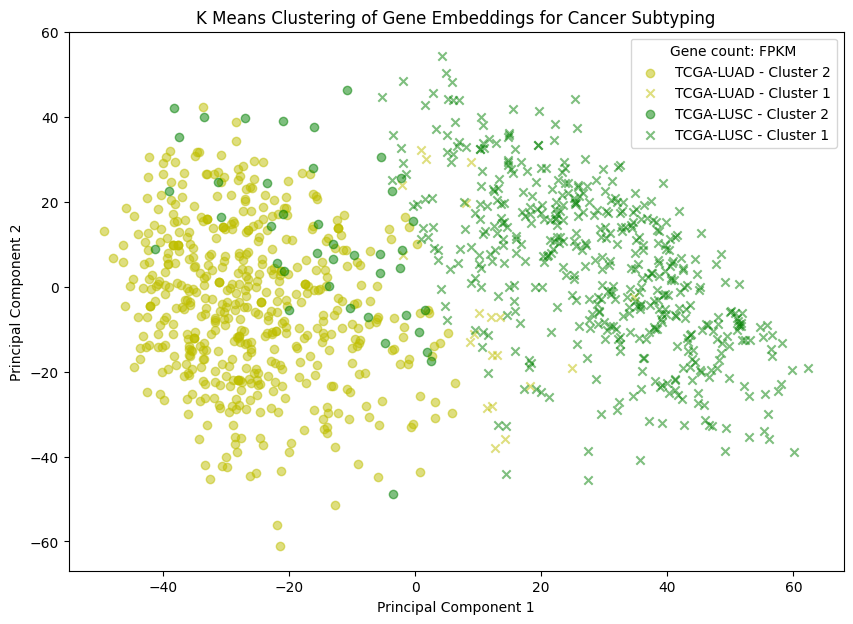

In [316]:
plt.figure(figsize=(10, 7))
colors = ['y', 'g']  
markers = ['o', 'x']  

for i, project in enumerate(df_f['project_id'].unique()):
    for j, cluster in enumerate(df_f['cluster'].unique()):
        subset = df_f[(df_f['project_id'] == project) & (df_f['cluster'] == cluster)]
        plt.scatter(subset[0], subset[1], label=f'{project} - Cluster {cluster}', 
                    color=colors[i], marker=markers[j], alpha=0.5)  

plt.title('K Means Clustering of Gene Embeddings for Cancer Subtyping')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.legend(title='Gene count: FPKM')
plt.show()

LUSC is cluster 1, LUAD is cluster 2.

In [315]:
# find the wrong predictions
df_f_wrong = df_f.loc[
    (df_f['cluster'] == 2) & (df_f['project_id'] == 'TCGA-LUSC') | 
    (df_f['cluster'] == 1) & (df_f['project_id'] == 'TCGA-LUAD')
    ]
df_f_wrong

,case_id,0,1,cluster,file_id,file_name,sample_id,portion_id,analyte_id,aliquots_id,project_id
69,TCGA-21-5787,-2.057177,8.797219,2,132bc0ae-2498-4a65-bcb9-1970b70b0df5,7dd3ae00-47e1-4214-a3cc-9f3e00321f11.rna_seq.a...,TCGA-21-5787-01A,TCGA-21-5787-01A-01,TCGA-21-5787-01A-01R,TCGA-21-5787-01A-01R-1635-07,TCGA-LUSC
75,TCGA-22-1005,-33.517331,40.074180,2,b6d66063-5c82-4be2-9355-1ba53abbb29b,7b582aa9-9564-4c04-9b68-a33f797056a7.rna_seq.a...,TCGA-22-1005-01A,TCGA-22-1005-01A-01,TCGA-22-1005-01A-01R,TCGA-22-1005-01A-01R-0692-07,TCGA-LUSC
78,TCGA-22-1016,-5.504108,7.805827,2,0889a6ea-a12a-4cc9-bec5-3103a3cdbba3,1fe2c91b-af3e-40f7-858d-9ed0faccbbe3.rna_seq.a...,TCGA-22-1016-01A,TCGA-22-1016-01A-01,TCGA-22-1016-01A-01R,TCGA-22-1016-01A-01R-0692-07,TCGA-LUSC
79,TCGA-22-1017,-19.973544,-5.532508,2,1cda41ee-8fba-45c4-b1ba-14f5844ace4a,6183a6eb-8d7f-44e9-8e59-5e74ddb7426c.rna_seq.a...,TCGA-22-1017-01A,TCGA-22-1017-01A-01,TCGA-22-1017-01A-01R,TCGA-22-1017-01A-01R-0692-07,TCGA-LUSC
82,TCGA-22-4594,-20.926908,17.267317,2,8ccc54f2-104f-4d3d-bf5a-b16b9e228110,9c7aa844-96f4-4906-9d7f-7c88a07d8dd6.rna_seq.a...,TCGA-22-4594-01A,TCGA-22-4594-01A-01,TCGA-22-4594-01A-01R,TCGA-22-4594-01A-01R-1201-07,TCGA-LUSC
...,...,...,...,...,...,...,...,...,...,...,...
950,TCGA-98-A53C,-37.410769,35.365472,2,10bec46a-08c3-4fe7-a65a-d801705fca17,90b40e5e-f443-45aa-a810-7026010c41f4.rna_seq.a...,TCGA-98-A53C-01A,TCGA-98-A53C-01A-11,TCGA-98-A53C-01A-11R,TCGA-98-A53C-01A-11R-A262-07,TCGA-LUSC
951,TCGA-98-A53D,-30.824057,16.535105,2,e8a0217b-86ba-47ef-83f6-1673cd259aec,2a1a5931-9e05-45f4-bbb9-22659ede3bbb.rna_seq.a...,TCGA-98-A53D-01A,TCGA-98-A53D-01A-32,TCGA-98-A53D-01A-32R,TCGA-98-A53D-01A-32R-A262-07,TCGA-LUSC
952,TCGA-98-A53H,-16.129163,28.091534,2,5be877e7-15a7-48e6-b05a-cb1dfa39aa25,f74ee32a-ef90-471a-a440-4bd444e8113e.rna_seq.a...,TCGA-98-A53H-01A,TCGA-98-A53H-01A-12,TCGA-98-A53H-01A-12R,TCGA-98-A53H-01A-12R-A262-07,TCGA-LUSC
1008,TCGA-NC-A5HJ,-21.962856,5.700118,2,5faf8a12-a2aa-44f1-b099-02106766ec94,e653f78b-82dc-4068-938e-c59cfae00c68.rna_seq.a...,TCGA-NC-A5HJ-01A,TCGA-NC-A5HJ-01A-11,TCGA-NC-A5HJ-01A-11R,TCGA-NC-A5HJ-01A-11R-A26W-07,TCGA-LUSC
